## Исследование данных о российском кинопрокате



**Цель исследования:**

>Изучить рынок российского кинопроката и выявить текущие тренды.

**Описание данных:**

Представленные датасеты с информацией из реестра прокатных удостоверений включают следующие колонки:

*Таблица mkrf_movies - данные о прокатных удостоверениях:*
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

*Таблица mkrf_shows - данные о прокате в российских кинотеатрах:*
- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

 
**План работ:**

- Объеденение данных в один датасет
- Предобработка данных из датасета 
- Исследовательский анализ данных
- Исследование трендов для фильмов, которые получили государственную поддержку


### Шаг 1 Объеденение датафреймов в один. 


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
from matplotlib.pyplot import figure

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
warnings.filterwarnings('ignore') # отключаем предупреждения

In [9]:
#данные о прокатных удостоверениях.
try:
    data_license = pd.read_csv('mkrf_movies.csv') 
except:
    data_license = pd.read_csv('C:/Users/Student/Desktop/mkrf_movies.csv')

display(data_license.head())


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [10]:
#данные о прокате в российских кинотеатрах
try:
    data_cinema = pd.read_csv('mkrf_shows.csv') 
except: 
    data_cinema = pd.read_csv('C:/Users/Student/Desktop/mkrf_movies.csv')
    
display(data_cinema.head())

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [11]:
#для объеденения таблиц необходимо изучить тип данных в столбце ('puNumber') по которому будет проходить объеденение 
display(data_license.info())
display(data_cinema.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

In [12]:
#Перевод стоблца из строчного вида в числовой
data_license['puNumber'] = pd.to_numeric(data_license['puNumber'], errors = 'coerce')

In [13]:
#объеденение таблиц в новой переменной 
full_data = data_license.merge(data_cinema, on = 'puNumber', how = 'left')

In [14]:
#просмотр первых 5 строк новой таблицы
full_data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.0,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416.0,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.0,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.0,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [15]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

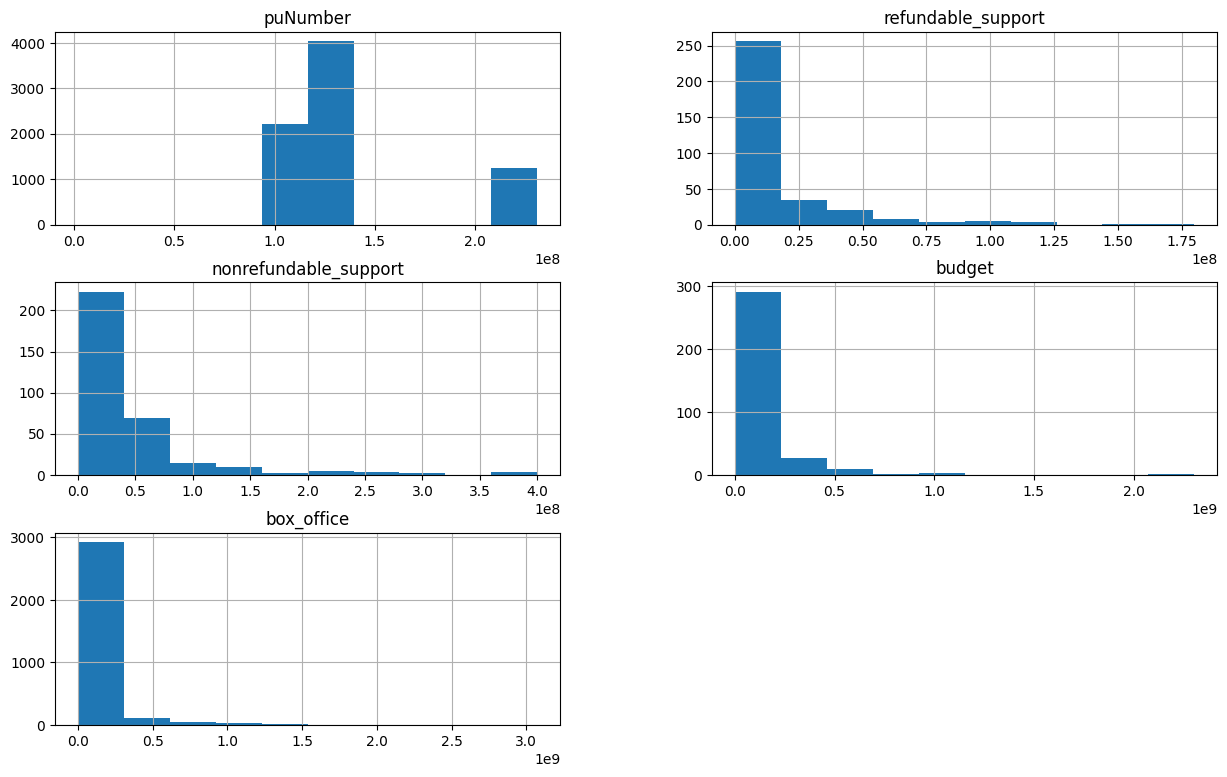

In [16]:
#визуальная оценка значений числовых показателей из таблицы
full_data.hist(figsize = (15, 9))
plt.show()

**Вывод:** Для объеденения представленных датасетов был скорректирован тип данных в таблице data_license. В новом сформировавшемся датасете 7486 строчек. Новый датасет включает все столбцы из датасета mkrf_movies и mkrf_shows. Так же в сформировавшемся датасете присутствуют значительные пропуски. 

### Шаг 2. Предобработка данных

In [17]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [18]:
#удалим 1 единственный пропуск номера в столбце 'puNumber'
full_data = full_data[full_data['puNumber'].isna() == False]

# full_data['puNumber'] = full_data['puNumber'].astype(object)

In [19]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод**: Был изменен тип данных в столбце puNumber для удобной сортировки по номерам прокатного удостоверения.

In [20]:
#поиск процента процента пропусков
pd.DataFrame(round(full_data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


In [21]:
#Пропущенные значения в столбцах film_studio, production_country, 
# director можно вырезать т.к. их количество не велико

full_data = full_data[full_data['film_studio'].isna() == False]
full_data = full_data[full_data['production_country'].isna() == False]
full_data = full_data[full_data['director'].isna() == False]

full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7458 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7458 non-null   object 
 1   puNumber               7458 non-null   float64
 2   show_start_date        7458 non-null   object 
 3   type                   7458 non-null   object 
 4   film_studio            7458 non-null   object 
 5   production_country     7458 non-null   object 
 6   director               7458 non-null   object 
 7   producer               6894 non-null   object 
 8   age_restriction        7458 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6511 non-null   object 
 14  genres                 6502 non-null   object 
 15  box_

In [22]:
#в столбце financing_source заполним пустые значение словосочетанием "стороннее финансирование".
full_data['financing_source'] = full_data['financing_source'].fillna(value = 'стороннее финансирование')


In [23]:
#форматирование значений в колонке show_start_date.
full_data['show_start_date'] = pd.to_datetime(full_data['show_start_date'],
                                             format='%Y-%m-%dT')

In [24]:
#проверка отображения даты
full_data['show_start_date'].head(5)

0   2015-11-27 12:00:00+00:00
1   2016-09-13 12:00:00+00:00
2   2016-10-10 12:00:00+00:00
3   2016-06-10 12:00:00+00:00
4   2015-07-29 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

In [25]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7458 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7458 non-null   object             
 1   puNumber               7458 non-null   float64            
 2   show_start_date        7458 non-null   datetime64[ns, UTC]
 3   type                   7458 non-null   object             
 4   film_studio            7458 non-null   object             
 5   production_country     7458 non-null   object             
 6   director               7458 non-null   object             
 7   producer               6894 non-null   object             
 8   age_restriction        7458 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Вывод**:Были заполнены пропуски в колонках film_studio, production_country, director, producer и genres путем удаления пустых значений из датасета. Так же был изминен тип данных в колонке 'show_start_date' на более читабельный вид.

In [26]:
display(full_data.duplicated().sum())

0

**Вывод:** Явные дубликаты в созданном датасете отсутствуют.

In [27]:
cat_values_coll = ['title', 'type', 'film_studio', 'production_country', 'director', 'producer', 
                   'age_restriction','financing_source', 
                  'ratings', 'genres']
        
for x in cat_values_coll:
    print('Уникальные значения для столбца', x, full_data[x].unique(), '\n')

Уникальные значения для столбца title ['Открытый простор' 'Особо важное задание' 'Особо опасен' ...
 'Щенячий патруль: Скорей спешим на помощь!'
 'Машины песенки. Серия "Испанские мотивы"'
 'Машины песенки. Серия "Когда цветут кактусы"'] 

Уникальные значения для столбца type ['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный'] 

Уникальные значения для столбца film_studio ['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз'
 'Киностудия "Мосфильм"'
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз'
 ...
 'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента '
 'Никелодеон Анимейшн Студиос, Спин Мастер'
 'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'] 

Уникальные значения для столбца production_country ['США' 'СССР' 'Франция' 'СССР, Венгри

In [28]:
warnings.filterwarnings('ignore')

#заменим неявные дубликаты в столбце 'title'
full_data['title'] = full_data['title'].str.replace('Глаз.', 'Глаз')
full_data['title'] = full_data['title'].str.replace('Атлантида: затерянный мир', 'Атлантида: Затерянный мир')
full_data['title'] = full_data['title'].str.replace('Блеф .', 'Блеф.')
full_data['title'] = full_data['title'].str.replace('Братья      .', 'Братья.')
full_data['title'] = full_data['title'].str.replace('Викинг .', 'Викинг.')
full_data['title'] = full_data['title'].str.replace('_', '')
full_data['title'] = full_data['title'].str.replace('.', '')
full_data['title'] = full_data['title'].str.replace('Холодное сердце.          Конь-огонь', 
                                                    'Холодное сердце. Конь-огонь')
full_data['title'] = full_data['title'].str.replace('Тачки 3                              Лу', 'Тачки 3')
full_data['title'] = full_data['title'].str.replace('Беспредел ', 'Беспредел')
full_data['title'] = full_data['title'].str.replace('Университет монстров               Синий зонтик',
                                                    'Университет монстров Синий зонтик')
full_data['title'] = full_data['title'].str.replace('Родина ', 'Родина')


In [29]:
#заменим лишние пробелы в значениях 'type' для устранения неявных дубликатов
full_data['type'] = full_data['type'].str.strip()


In [30]:
#заменим самые часто встречающиеся некорректные записи названий фильма
full_data['title'] = full_data['title'].str.replace(' _', '')
full_data['title'] = full_data['title'].str.replace('_', '')


In [31]:
#заменим различающиеся записи стран на общепринятый стандарт для этой колонки
full_data['production_country'] = full_data['production_country'].str.replace(',', ' - ')
full_data['production_country'] = full_data['production_country'].str.replace(' - ', '-')
full_data['production_country'] = full_data['production_country'].str.replace('- ', '-')
full_data['production_country'] = full_data['production_country'].str.replace(' -', '-')

#так же очистим запись стран от ошибочной записи
full_data = full_data[full_data['production_country'] != '2019']

In [32]:
#заменим пробелы, встречающиеся в записи жанра
full_data['genres'] = full_data['genres'].str.strip()

In [33]:
#изменим ти данных и удалим созданные от перевода значений пропуски
full_data['ratings'] = pd.to_numeric(full_data['ratings'], errors = 'coerce')
full_data = full_data.dropna(subset = ['ratings'])

**Вывод:** В данных присутствует большое количество неявных дубликатов. Все значения, которые можно было заменить, были заменены. Так же изменен тип данных для колонки 'ratings' в количественное значение.

array([         nan, 0.000000e+00, 5.000000e+07, 2.600000e+07,
       3.000000e+07, 1.500000e+07, 1.000000e+07, 2.000000e+07,
       7.153119e+06, 2.500000e+07, 4.000000e+07, 6.000000e+07,
       4.400000e+07, 2.900000e+07, 4.100000e+07, 3.600000e+07,
       3.500000e+06, 5.000000e+06, 1.900000e+07, 9.000000e+06,
       1.100000e+08, 1.700000e+07, 7.500000e+07, 1.500000e+08,
       3.800000e+07, 1.000000e+08, 5.500000e+07, 7.000000e+06,
       7.346881e+06, 8.000000e+06, 1.150000e+08, 3.500000e+07,
       1.800000e+08, 2.800000e+07, 8.000000e+07])

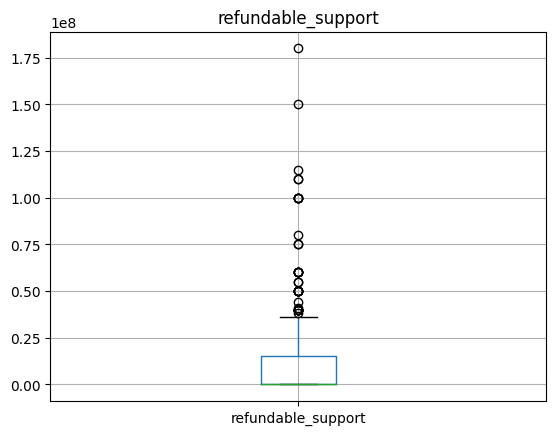

array([           nan, 2.65000000e+07, 1.07847945e+08, 2.80000000e+07,
       2.50000000e+07, 1.00000000e+08, 4.65022990e+07, 7.50000000e+07,
       3.40000000e+07, 3.00000000e+07, 4.00000000e+07, 2.30000000e+07,
       4.50000000e+07, 5.65790550e+07, 2.55000000e+07, 2.75100000e+07,
       2.40000000e+07, 2.45000000e+07, 2.70000000e+07, 5.00000000e+06,
       9.00000000e+07, 2.60000000e+07, 2.00000000e+07, 7.00000000e+07,
       9.70000000e+07, 2.44500000e+07, 5.00000000e+07, 0.00000000e+00,
       6.00000000e+07, 2.75000000e+07, 2.69500000e+07, 1.10000000e+08,
       1.50000000e+07, 5.90000000e+07, 2.50000000e+08, 3.70000000e+07,
       3.50000000e+07, 2.01452850e+07, 2.59000000e+07, 6.00000000e+06,
       3.92104482e+08, 2.52000000e+07, 2.29040000e+07, 2.90000000e+07,
       5.10000000e+07, 5.30000000e+06, 2.17000000e+07, 2.49860000e+07,
       2.53450000e+07, 1.33000000e+08, 1.75000000e+08, 3.01239150e+07,
       2.85000000e+07, 1.00000000e+07, 3.00000000e+08, 4.15000000e+07,
      

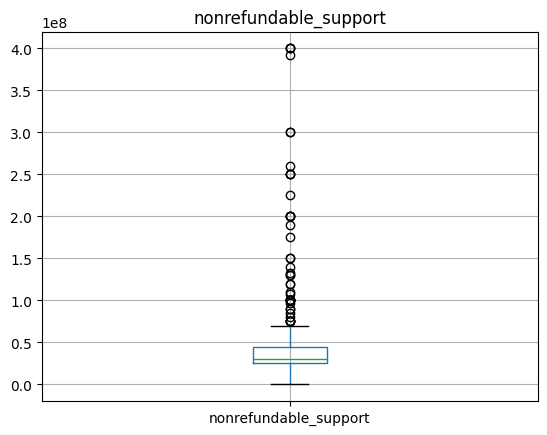

array([           nan, 7.94119000e+07, 1.76023490e+08, 4.05741400e+07,
       4.00151220e+07, 5.18500000e+07, 2.20588394e+08, 8.62100670e+07,
       1.39551503e+08, 4.85714300e+07, 8.00000000e+07, 3.62595000e+07,
       7.08761720e+07, 2.52489571e+08, 7.49100000e+07, 0.00000000e+00,
       8.97823120e+07, 4.36437176e+08, 4.05000000e+07, 6.84906060e+07,
       4.50066090e+07, 1.31000000e+08, 5.00000000e+08, 6.10114070e+07,
       3.52969500e+07, 4.30000000e+07, 7.74017510e+07, 3.50000000e+07,
       5.11967110e+07, 9.01200000e+07, 2.67288892e+08, 3.71428570e+07,
       4.00000000e+07, 4.92804960e+07, 4.69688830e+07, 5.51950000e+07,
       1.56360666e+08, 3.74247960e+07, 3.57600600e+07, 2.81155800e+07,
       3.79436520e+07, 1.38325738e+08, 4.22525090e+07, 3.99900000e+07,
       1.12000000e+08, 5.57294240e+07, 3.57142860e+07, 1.39357211e+08,
       5.02187410e+07, 4.02650000e+07, 3.90579710e+07, 9.25000000e+07,
       4.14978600e+07, 8.62363940e+07, 8.03241370e+07, 2.40153900e+08,
      

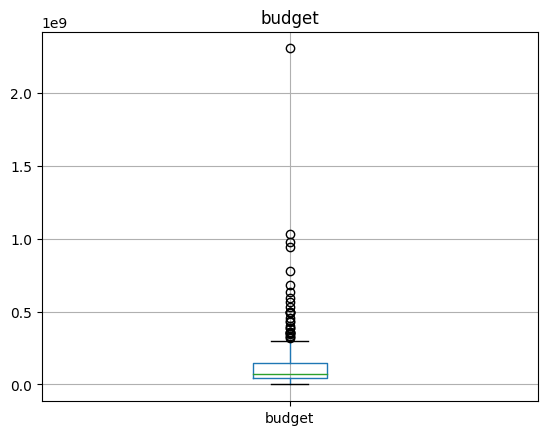

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 8.2, 7.5, 6.7, 7.9, 5.9, 6.2,
       5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4, 4.4,
       4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2, 5.2,
       4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8, 1.5,
       2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7, 9. ,
       8.9, 9.1])

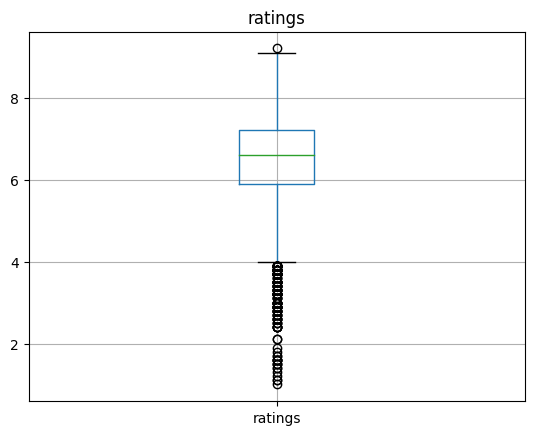

array([           nan, 2.70000000e+03, 3.60000000e+02, ...,
       5.01069235e+08, 3.14379050e+06, 1.80017724e+07])

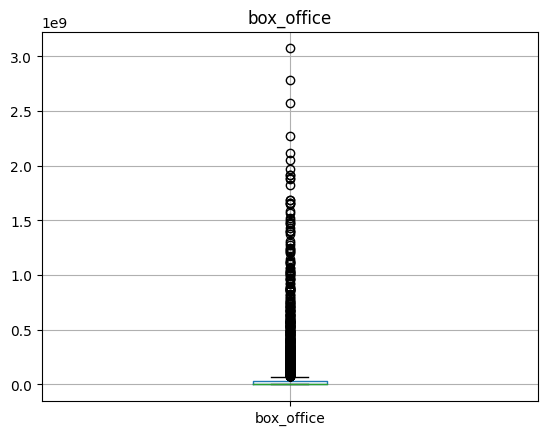

In [34]:
find_anomaly = ['refundable_support', 'nonrefundable_support', 
             'budget', 'ratings', 'box_office']

for x in find_anomaly:
    full_data.boxplot(x)
    display(full_data[x].unique())
    plt.title(x)
    plt.show()
    

Т.к. для большенства значений для данных колонок равны 0, то и медианное значение близко к нулю.

In [35]:
#заменим пропуски в столбцах refundable_support, nonrefundable_support и budget на 0, 
#по условию колока budget заполнена только у тех фильмов, у которых есть гос. финансирование

full_data['refundable_support'] = full_data['refundable_support'].fillna(value = 0)

full_data['nonrefundable_support'] = full_data['nonrefundable_support'].fillna(value = 0)

full_data['budget'] = full_data['budget'].fillna(value = 0)

**Вывод:** Были скорректированы пустые значения в колонках refundable_support, nonrefundable_support и budget.

- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [36]:
#создание колонки с годом выхода фильма
full_data['year'] = full_data['show_start_date'].dt.year
full_data['year'] = full_data['year'].astype(object)

In [37]:
#cброс старых индексов у строчек датафрейма
full_data = full_data.reset_index()

In [38]:
#проверка на корректность отображения
full_data['year'].head(5)

0    2015
1    2016
2    2016
3    2016
4    2015
Name: year, dtype: object

In [39]:
def name_split(row):
    """Функция выделяет 1-ое  значение из списка, делит его на 2 элемента и возвращает имя (элемент 1)"""
    full = row['producer']
    obj = full
    try:
        obj = obj.split(',')
        obj = obj[0]
        obj = obj.split(' ')
        return obj[0]
    except:
        pass

In [40]:
def surname_split(row):
    """Функция выделяет 1-ое значение из списка, делит его на 2 элемента и возвращает фамилию (элемент 2)"""
    full = row['producer']
    obj = full
    try:
        obj = obj.split(',')
        obj = obj[0]
        obj = obj.split(' ')
        return obj[1]
    except:
        pass

In [41]:
def main_genre_split(row):
    """Функция выделяет 1-ый элемент из списка и возврощает  это значение"""
    full = row['genres']
    obj = full
    try:
        obj = obj.split(',')
        obj = obj[0]
        obj = obj.split(' ')
        return obj[0]
    except:
        pass


In [42]:
#запись значений в колонках
full_data['name'] = full_data.apply(name_split, axis = 1)
full_data['surname'] = full_data.apply(surname_split, axis = 1)
full_data['main_genre'] = full_data.apply(main_genre_split, axis = 1)


In [43]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6481 entries, 0 to 6480
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   index                  6481 non-null   int64              
 1   title                  6481 non-null   object             
 2   puNumber               6481 non-null   float64            
 3   show_start_date        6481 non-null   datetime64[ns, UTC]
 4   type                   6481 non-null   object             
 5   film_studio            6481 non-null   object             
 6   production_country     6481 non-null   object             
 7   director               6481 non-null   object             
 8   producer               6004 non-null   object             
 9   age_restriction        6481 non-null   object             
 10  refundable_support     6481 non-null   float64            
 11  nonrefundable_support  6481 non-null   float64          

In [44]:
full_data = full_data[full_data['genres'].isna() == False]

In [45]:
#проверка корректности отображения
full_data.head(5)

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,name,surname,main_genre
0,0,Открытый простор,221048915.0,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,стороннее финансирование,7.2,"боевик,драма,мелодрама",NaN,2015,Дэвид,Валдес,боевик
1,1,Особо важное задание,111013716.0,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,стороннее финансирование,6.6,"драма,военный",NaN,2016,None,None,драма
2,2,Особо опасен,221038416.0,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,стороннее финансирование,6.8,"фантастика,боевик,триллер",NaN,2016,Джим,Лемли,фантастика
3,3,Особо опасен,221026916.0,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,стороннее финансирование,6.8,"фантастика,боевик,триллер",NaN,2016,Джим,Лемли,фантастика
4,4,Особо опасен,221030815.0,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,стороннее финансирование,6.8,"фантастика,боевик,триллер",NaN,2015,Джим,Лемли,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [46]:
#процент от общего бюджета
full_data['gos_finance_procent'] = round(((full_data['refundable_support'] + full_data['nonrefundable_support'])/ full_data['budget'])*100, 2) 

In [47]:
# заменим значения Nan на 0 - нет го поддержика
full_data['gos_finance_procent'] = full_data['gos_finance_procent'].fillna(value = 0)

In [48]:
#проверка на корректный расчет процента
full_data['gos_finance_procent'].unique()

array([ 0.  , 33.37, 61.27, 69.01, 62.48, 48.22, 68.  , 53.94, 53.74,
       70.  , 68.95, 35.27, 27.72, 37.38,   inf, 50.12, 12.96, 62.96,
       65.7 , 66.66, 21.  , 12.  , 40.98, 67.99, 69.77, 38.76, 52.74,
       22.19, 33.67, 68.99, 42.58, 36.24, 62.04, 65.33, 69.91, 17.78,
       69.84, 36.15, 66.27, 67.52, 25.  , 66.39, 43.05, 68.3 , 69.  ,
       32.43, 60.24, 63.78, 62.25, 62.46, 29.92, 69.5 , 64.97, 55.56,
       36.76, 68.72, 62.29, 69.44, 48.23, 67.12, 36.1 , 34.07, 66.67,
       62.59, 59.32, 37.31, 59.23, 16.99, 59.53, 43.49, 64.1 , 35.14,
       43.33, 67.15, 33.05, 69.59, 66.51, 64.94, 52.67, 36.89, 65.45,
       33.85, 67.66, 64.99, 48.35, 51.38, 10.02, 65.5 , 65.  , 63.16,
       52.72, 22.31, 22.93, 44.31, 50.83, 11.72, 38.46, 58.65, 63.01,
       36.61, 30.74, 60.  , 50.  , 66.29, 47.31, 66.74, 22.53, 63.22,
       16.39, 65.77, 12.16, 47.62, 45.26, 36.84, 64.45, 32.85, 61.88,
       51.84, 26.57, 49.39, 55.05, 69.41, 23.63, 64.  , 65.81, 63.89,
       69.71, 42.77,

In [49]:
#замена отсутствующего значения на Nan
full_data['gos_finance_procent'] = full_data['gos_finance_procent'].replace(np.inf, 'NaN')

full_data['gos_finance_procent'] = full_data['gos_finance_procent'].fillna(value = 0)

**Вывод**: Были добавлены столбци с информацией о годе выхода фильма, именем, фамилией главного режиссёра, основной жанр фильма, и процент гос. финансирования от общего бюджета фильма.

### Шаг 3. Исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

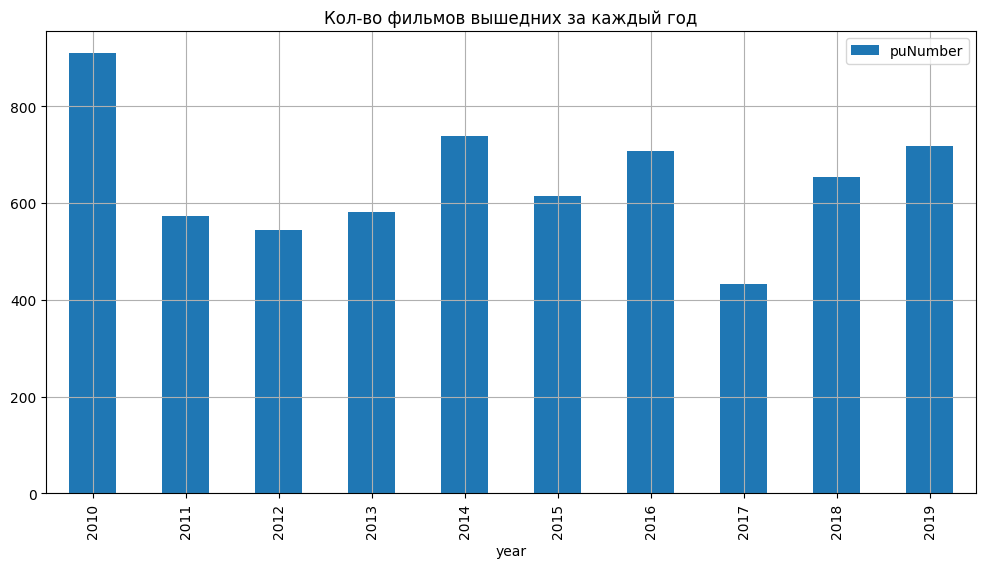

In [50]:
#Кол-во фильмов вышедних за каждый год'
full_data.groupby('year').agg({'puNumber':'count'}).plot(kind = 'bar',
                    title = 'Кол-во фильмов вышедних за каждый год', grid = True,
                    figsize = (12,6))
plt.show()

Т.к. не все вышедшие фильмы были в прокате, создадим новый датасет со срезом фильмов, у кого заполнены значения сборов в прокате

In [51]:
#новый датасет 
box_office_data = full_data.loc[(full_data['box_office'].isna() == False) & (full_data['box_office'] > 0)]

Из-за больших значений сумм в колонке box_office решено перевести значений в тысячи

In [52]:
#разделим значения на 1000 и округлим до 2 знаков 
box_office_data['box_office'] = round(box_office_data['box_office']/1000, 3)

In [53]:
#проверка корректности записи данных
box_office_data['box_office'].unique()

array([2.70000000e+00, 3.60000000e-01, 4.20000000e-01, ...,
       5.01069235e+05, 3.14379000e+03, 1.80017720e+04])

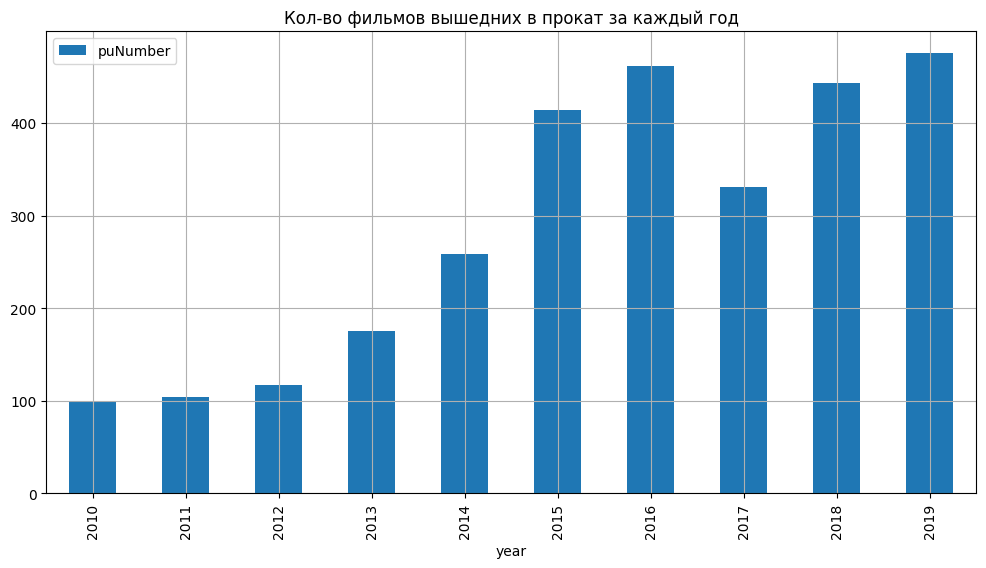

In [54]:
#Кол-во фильмов вышедних в прокат за каждый год

box_office_data.groupby('year').agg({'puNumber':'count'}).plot(kind = 'bar',
                    title = 'Кол-во фильмов вышедних в прокат за каждый год',
                    grid = True, figsize = (12,6))
plt.show()


**Вывод:** Количество фильмов, вышедших в прокат начиная с 2015 года, увеличелось в 4 раза, по сравнению с 2010-2012 годами. При этом с 2010 года наблюдается уменьшение кол-ва фильмов в среднем на 200 ед. по сравнению с 2010 годом.

In [55]:
#Создание сводной таблицы по годам 
box_pivot_table = box_office_data.pivot_table(index = 'year', values = 'box_office', aggfunc = ['count', 'min', 'max'])
box_pivot_table['total'] = box_office_data.groupby('year').agg({'box_office':'sum'})

In [56]:
#проверка значений
box_pivot_table

,count,min,max,total
,box_office,box_office,box_office,
year,,,,
2010,99,0.075,1446.400,2.417409e+03
2011,104,0.125,860.810,2.056610e+03
2012,117,0.080,2311.220,6.861208e+03
2013,175,0.040,19957.032,2.967979e+04
2014,258,0.050,1016410.635,7.317079e+06
2015,414,0.100,1658861.426,3.761280e+07
2016,461,0.200,2048126.108,4.580366e+07
2017,331,24.310,2779686.144,4.611820e+07


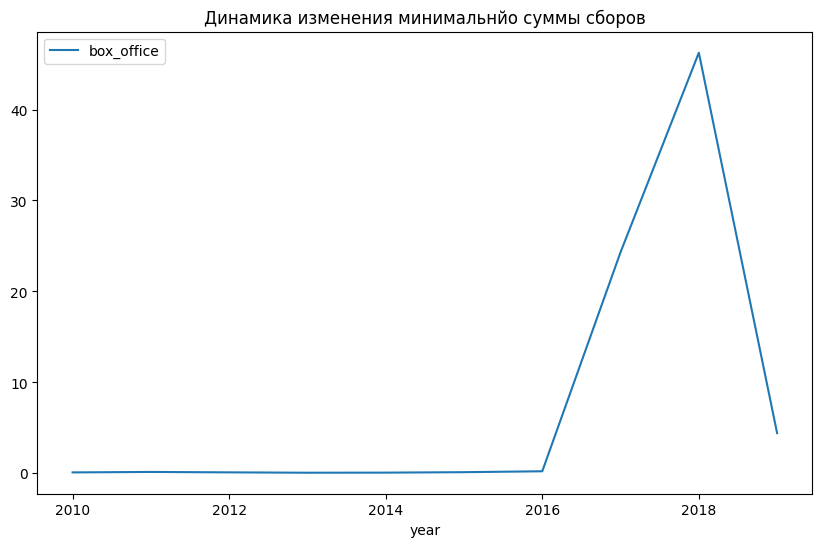

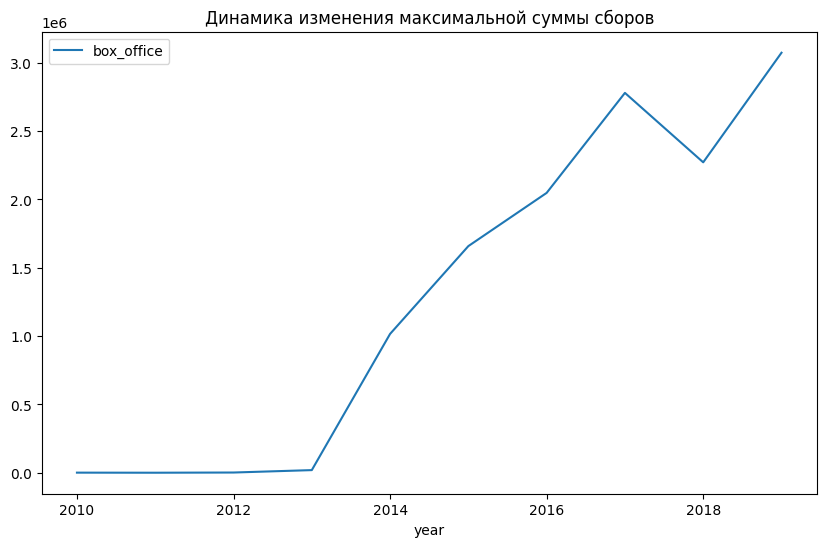

In [57]:
#Построение графиков динамики роста значений

box_pivot_table.plot(y = 'min', title = 'Динамика изменения минимальнйо суммы сборов', figsize = (10, 6))
box_pivot_table.plot(y = 'max', title = 'Динамика изменения максимальной суммы сборов', figsize = (10, 6))

plt.show()

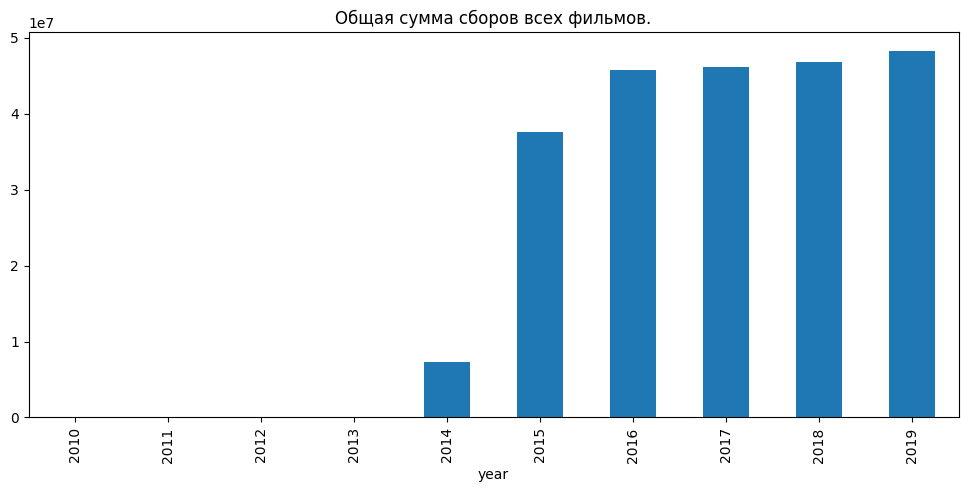

In [58]:
box_pivot_table['total'].plot(kind = 'bar', figsize = (12,5),
                             title = 'Общая сумма сборов всех фильмов.')
plt.show()

Видно, что для минимальные сборы описываются практически нулевыми значениями, в то время как максимальные сборы могут измерятся десятками миллионов. Вероятно, присутствуют вбросовые значения, или существует особенность проката того или иного фильма.

In [59]:
#Создание сводной таблицы по годам со средней и ммедианной суммы сборов
box_pivot_table = box_office_data.pivot_table(index = 'year', values = 'box_office', 
                                              aggfunc = ['count', 'mean', 'median'])

In [60]:
#проверка значений
box_pivot_table

,count,mean,median
,box_office,box_office,box_office
year,,,
2010,99,24.418273,1.710
2011,104,19.775096,2.995
2012,117,58.642803,6.220
2013,175,169.598783,3.580
2014,258,28360.773225,18.885
2015,414,90852.180234,7438.477
2016,461,99357.172087,5462.267
2017,331,139329.921979,10739.479


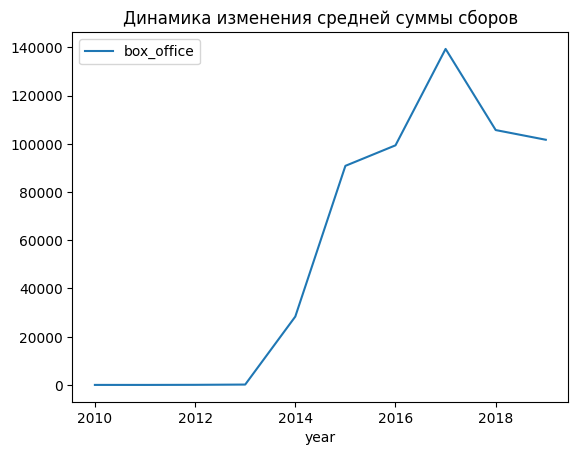

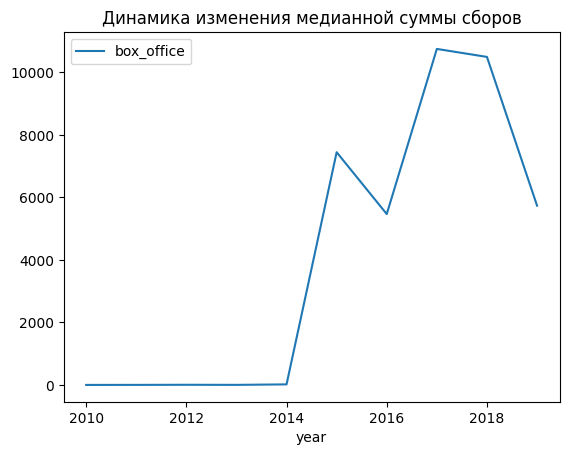

In [61]:
#Построение графиков динамики изменения значений 

box_pivot_table.plot(y = 'mean', title = 'Динамика изменения средней суммы сборов')
box_pivot_table.plot(y = 'median', title = 'Динамика изменения медианной суммы сборов')

plt.show()

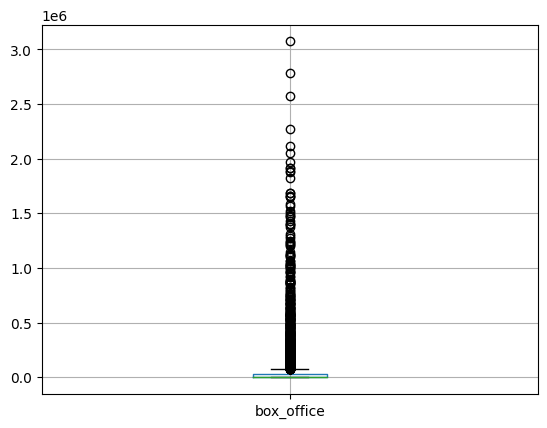

In [62]:
#распределение значений 'box_office'
box_office_data.boxplot('box_office')
plt.show()

При изучении гистрограммы распределения значений можно сделать вывод, что невозможно определить медианное значение фильмов, т.к. на данное распределение сильно влияет сам фильм. Можно сказать, что поиск медианного значения в текущем датасете будет отображать искаженное видение ситуации в кинопрокате. 

<div class="alert alert-success">

**Артём:** 👍 Принято.

</div> 

In [63]:
#создадим датасет с заданным диапазоном года
box_office_data_2015 = box_office_data[box_office_data['year'] >= 2015]

In [64]:
#Создание сводной таблицы по возрастному ограничению
box_pivot_table = box_office_data_2015.pivot_table(index = 'age_restriction',\
                                              values = 'box_office', aggfunc = ['count', 'sum'])

In [65]:
#прверка коррекности значений
pd.options.display.float_format = '{:,.2f}'.format
display(box_pivot_table)

,count,sum
,box_office,box_office
age_restriction,,
«0+» - для любой зрительской аудитории,43,"654,054.25"
«12+» - для детей старше 12 лет,295,"58,291,018.96"
«16+» - для детей старше 16 лет,748,"73,086,906.25"
«18+» - запрещено для детей,756,"40,466,220.80"
«6+» - для детей старше 6 лет,282,"52,149,145.43"


In [66]:
def create_pivot_table(dataset, age):
    """Функция создает сводную таблицу в зависимости от возростной категории фильма"""
    data = dataset
    age_cat = age
    pivot = data[data['age_restriction'] == age_cat].pivot_table(\
                                    index = 'year', values = 'box_office', 
                                    aggfunc = ['count', 'sum'])
    return pivot

In [67]:
#создание сводных таблиц с каждой категорие фильмов
box_pivot_table_0 = create_pivot_table(box_office_data_2015, '«0+» - для любой зрительской аудитории')
box_pivot_table_6 = create_pivot_table(box_office_data_2015, '«6+» - для детей старше 6 лет')
box_pivot_table_12 = create_pivot_table(box_office_data_2015, '«12+» - для детей старше 12 лет')
box_pivot_table_16 = create_pivot_table(box_office_data_2015, '«16+» - для детей старше 16 лет')
box_pivot_table_18 = create_pivot_table(box_office_data_2015, '«18+» - запрещено для детей')


In [68]:
#создание общей сводной таблицы 
total_pivot = box_office_data_2015.pivot_table(index = 'year', values = 'box_office')


In [69]:
#перенос значений из созданных сводных таблиц в общую таблицу 
total_pivot['0+'] = box_pivot_table_0['sum']
total_pivot['6+'] = box_pivot_table_6['sum']
total_pivot['12+'] = box_pivot_table_12['sum']
total_pivot['16+'] = box_pivot_table_16['sum']
total_pivot['18+'] = box_pivot_table_18['sum']

In [70]:
pd.options.display.float_format = '{:,.0f}'.format
display(total_pivot)

,box_office,0+,6+,12+,16+,18+
year,,,,,,
2015,"90,852","327,577","7,336,735","13,615,515","11,062,212","5,270,763"
2016,"99,357","79,928","10,811,814","12,187,726","15,959,376","6,764,812"
2017,"139,330","228,657","11,078,562","7,350,015","17,840,388","9,620,582"
2018,"105,689","4,112","10,097,865","12,471,625","15,508,901","8,737,782"
2019,"101,668","13,780","12,824,169","12,666,138","12,716,029","10,072,281"


In [71]:
#удалим ненужный столбец
total_pivot = total_pivot.drop(labels = ['box_office'], axis = 1)

In [72]:
#проверка значений
pd.options.display.float_format = '{:,.0f}'.format
display(total_pivot)

,0+,6+,12+,16+,18+
year,,,,,
2015,"327,577","7,336,735","13,615,515","11,062,212","5,270,763"
2016,"79,928","10,811,814","12,187,726","15,959,376","6,764,812"
2017,"228,657","11,078,562","7,350,015","17,840,388","9,620,582"
2018,"4,112","10,097,865","12,471,625","15,508,901","8,737,782"
2019,"13,780","12,824,169","12,666,138","12,716,029","10,072,281"


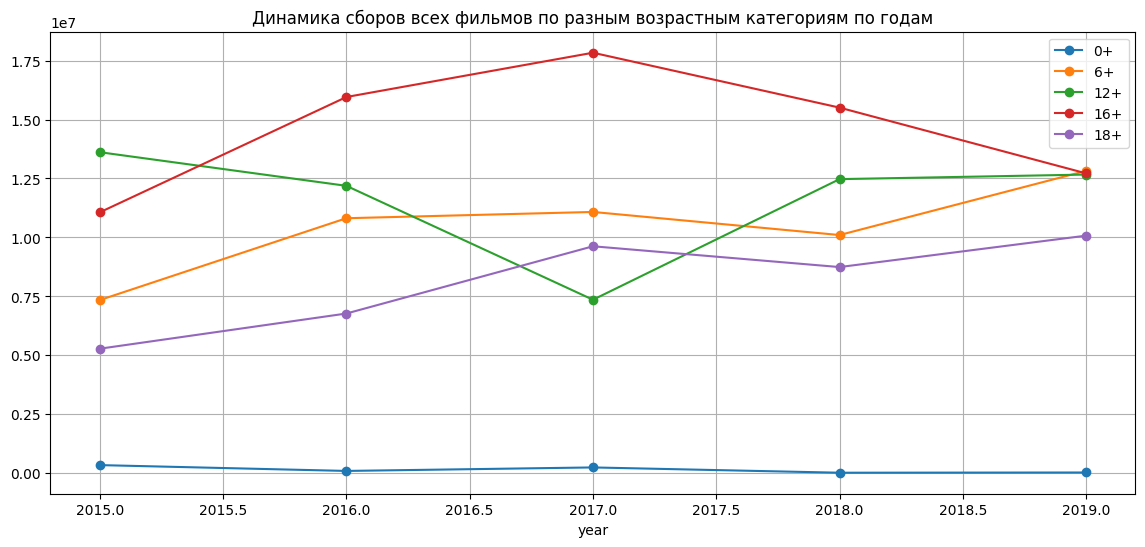

In [73]:
total_pivot.plot(style = 'o-', figsize = (14,6), grid = True, 
title = 'Динамика сборов всех фильмов по разным возрастным категориям по годам')
plt.show()

**Вывод**:Было изучено количетсво фильмов выходившие каждый год в прока. Выявлено, что в датасете присутствую минимальные сборы фильмов в прокате (около 1 тыс. рублей) что говорит о потенциальной ошибке в записи или сборе данной информации. Выявлено, что самыми больше всего в прокате собирают фильмы с категорией 16+. 

### Шаг 4. Исследование фильмов, которые получили государственную поддержку

In [74]:
#исследование на основе года выпуска фильма в прокат

#создадим датасеты где присутствуют только фильмы с гос финансированием и без него
gos_finance = full_data[full_data['budget'] != 0]
gos_finance['box_office'] =  round(gos_finance['box_office']/1000, 3)

not_gos_finance = full_data[full_data['budget'] == 0]
not_gos_finance['box_office'] = round(not_gos_finance['box_office']/1000, 3)

In [75]:
#для измерения кол-ва данных для каждого года 
gos_pivot_year = gos_finance.pivot_table(index = 'year', 
                                         values = 'puNumber', aggfunc = 'count')
not_gos_pivot_year = not_gos_finance.pivot_table(index = 'year',
                                                 values = 'puNumber', aggfunc = 'count')

In [76]:
#суммарная сумма сборов всех фильмов
gos_pivot_year['total_box_office_sum'] = gos_finance.groupby('year').agg({'box_office': 'sum'})
not_gos_pivot_year['total_box_office_sum'] = not_gos_finance.groupby('year').agg({'box_office': 'sum'})

In [77]:
#среднйи рейтинг фильмов по годам
gos_pivot_year['median_rating'] = gos_finance.groupby('year').agg({'ratings': 'median'})
not_gos_pivot_year['median_rating'] = not_gos_finance.groupby('year').agg({'ratings': 'median'})

In [78]:
gos_pivot_year

,puNumber,total_box_office_sum,median_rating
year,,,
2013,2,"20,322",7
2014,14,"1,007,160",6
2015,75,"4,803,397",6
2016,54,"4,945,550",6
2017,37,"10,752,944",6
2018,50,"8,070,710",6
2019,66,"8,258,543",6


In [79]:
not_gos_pivot_year

,puNumber,total_box_office_sum,median_rating
year,,,
2010,909,"2,417",7
2011,574,"2,057",7
2012,545,"6,861",7
2013,580,"9,357",7
2014,724,"6,309,919",7
2015,540,"32,809,405",6
2016,654,"40,858,107",7
2017,396,"35,365,260",6
2018,604,"38,749,576",6


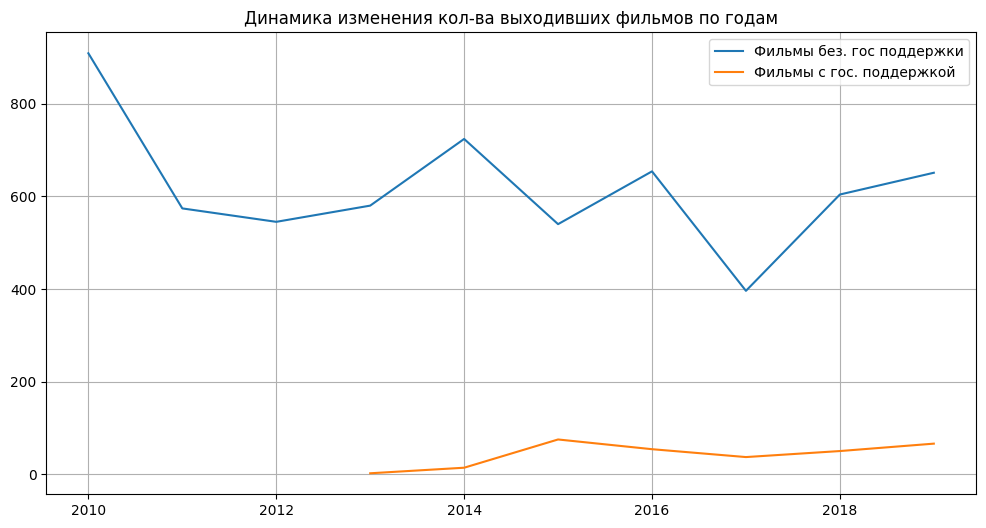

In [80]:
plt.figure(figsize=(12,6))

plt.plot(not_gos_pivot_year['puNumber'])
plt.plot(gos_pivot_year['puNumber'])
plt.grid(True)

plt.legend(['Фильмы без. гос поддержки', 'Фильмы с гос. поддержкой'])
plt.title('Динамика изменения кол-ва выходивших фильмов по годам')
plt.show()

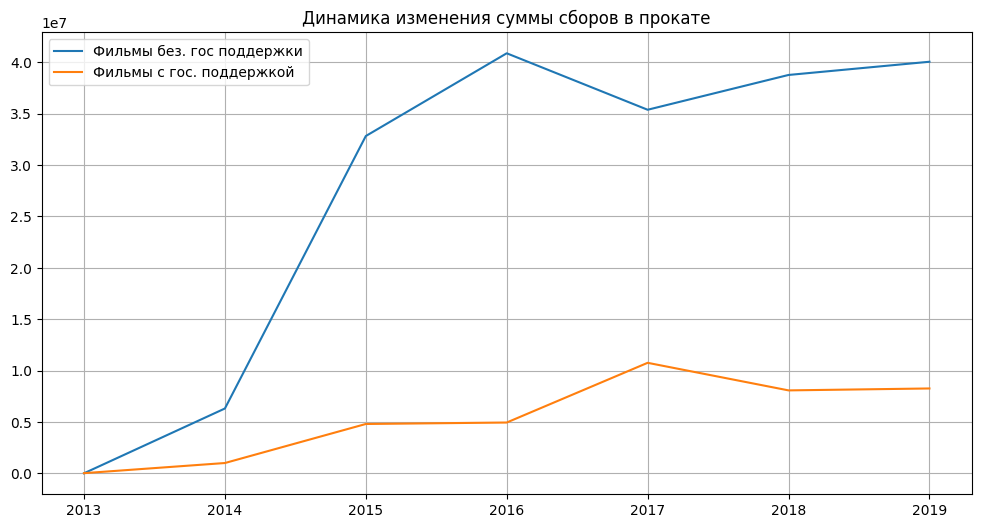

In [81]:
plt.figure(figsize=(12,6))

plt.plot(not_gos_pivot_year['total_box_office_sum'][3:])
plt.plot(gos_pivot_year['total_box_office_sum'])
plt.grid(True)

plt.legend(['Фильмы без. гос поддержки', 'Фильмы с гос. поддержкой'])
plt.title('Динамика изменения суммы сборов в прокате')
plt.show()

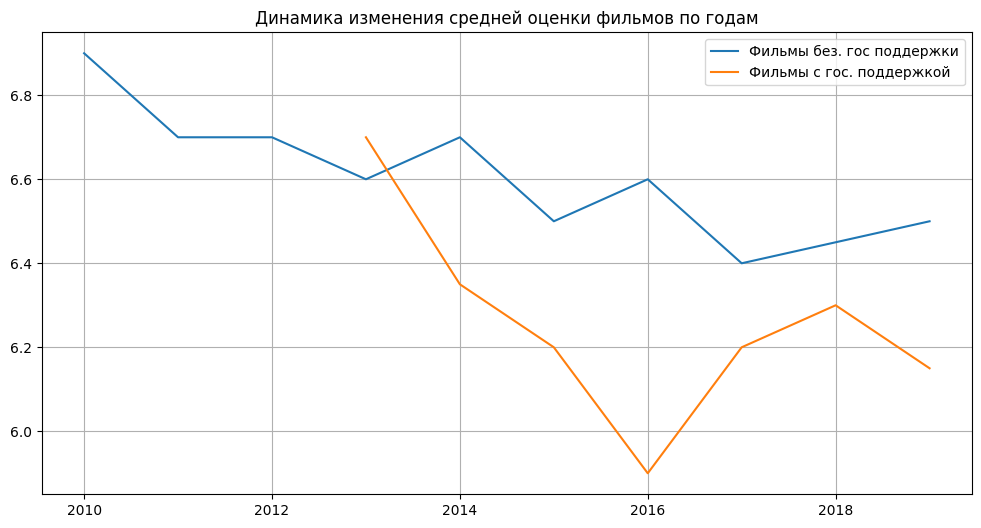

In [82]:
plt.figure(figsize=(12,6))

plt.plot(not_gos_pivot_year['median_rating'])
plt.plot(gos_pivot_year['median_rating'])
plt.grid(True)

plt.legend(['Фильмы без. гос поддержки', 'Фильмы с гос. поддержкой'])
plt.title('Динамика изменения средней оценки фильмов по годам')
plt.show()

**Вывод**: Количество фильмов с гос поддержекой значительно меньше, чем фильмов без неё. Соответственно и суммарные сборы фильмов без гос. поддержки в разы больше. Так же рейтинг для фильмов с гос. поддержкой ниже в среднем на 0.2 пункта. Общее наблюдение для двух групп фильмов: с 2010 года заметен спад среднего рейтинга фильмов для всех групп.

In [83]:
# добавим информацию об изменениях бюджетов фильмов в общей сумме
gos_pivot_year['budget_dinamica'] = gos_finance.groupby('year').agg({'budget': 'sum'})

In [84]:
gos_pivot_year

,puNumber,total_box_office_sum,median_rating,budget_dinamica
year,,,,
2013,2,"20,322",7,"255,435,390"
2014,14,"1,007,160",6,"1,242,341,926"
2015,75,"4,803,397",6,"7,094,692,135"
2016,54,"4,945,550",6,"6,997,280,718"
2017,37,"10,752,944",6,"6,895,793,781"
2018,50,"8,070,710",6,"6,456,185,636"
2019,66,"8,258,543",6,"12,301,112,435"


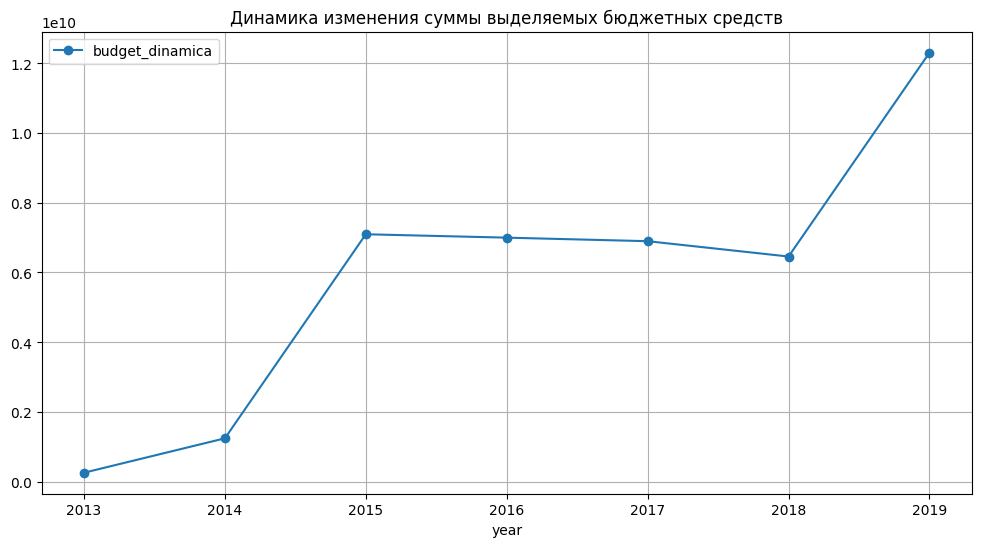

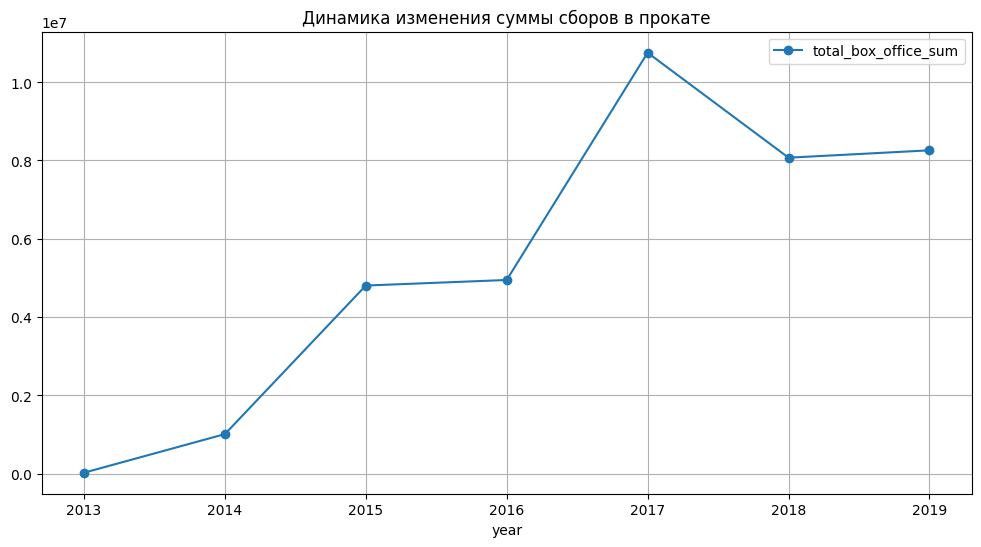

In [85]:
gos_pivot_year.plot( y = 'budget_dinamica', figsize = (12,6), 
                grid = 'True', style = 'o-',
                   title = 'Динамика изменения суммы выделяемых бюджетных средств')
gos_pivot_year.plot( y = 'total_box_office_sum', figsize = (12,6), 
                    grid = 'True', style = 'o-',
                   title = 'Динамика изменения суммы сборов в прокате')
plt.show()

**Вывод:** Сумма сборов фильмов в прокате в 1000 раз меньше чем сумма выделяемых бюджетных средств. Можно сделать вывод, что большенство фильмов не окупают вложенных средств.

In [86]:
#исследование на основе возрастных категорий фильмов

#для измерения кол-ва данных для каждой возрастной категории
gos_pivot_age = gos_finance.pivot_table(index = 'age_restriction', 
                                        values = 'puNumber', aggfunc = 'count')
not_gos_pivot_age = not_gos_finance.pivot_table(index = 'age_restriction', 
                                                values = 'puNumber', aggfunc = 'count')



In [87]:
#суммарная сумма сборов всех фильмов
gos_pivot_age['total_box_office_sum'] = gos_finance.groupby('age_restriction') \
            .agg({'box_office': 'sum'})
not_gos_pivot_age['total_box_office_sum'] = not_gos_finance.groupby('age_restriction').agg({'box_office': 'sum'})



In [88]:

#среднйи рейтинг фильмов
gos_pivot_age['median_rating'] = gos_finance.groupby('age_restriction') \
    .agg({'ratings': 'median'})
not_gos_pivot_age['median_rating'] = not_gos_finance.groupby('age_restriction')\
    .agg({'ratings': 'median'})

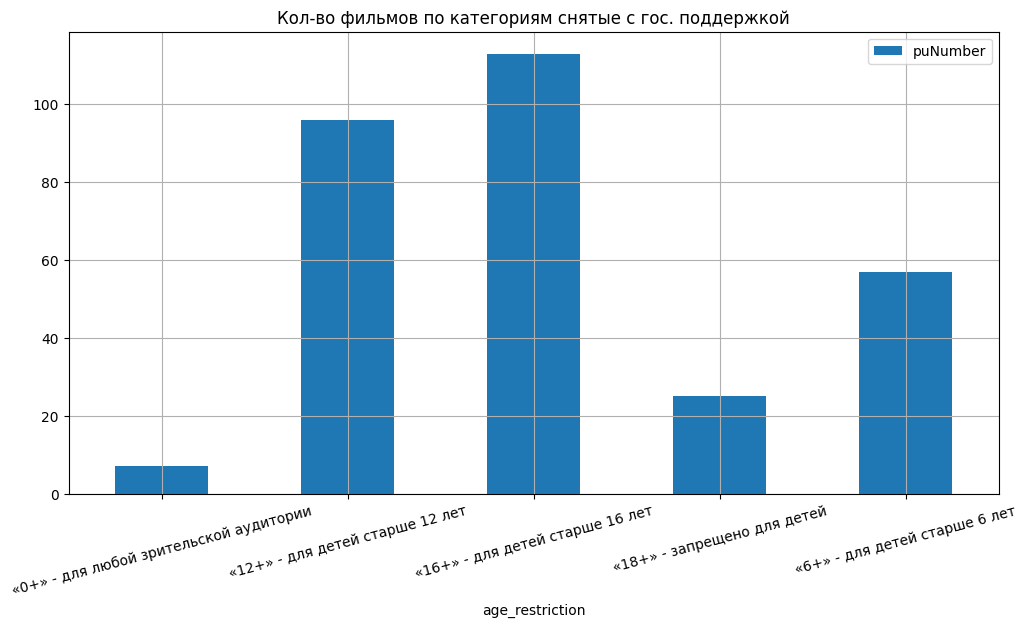

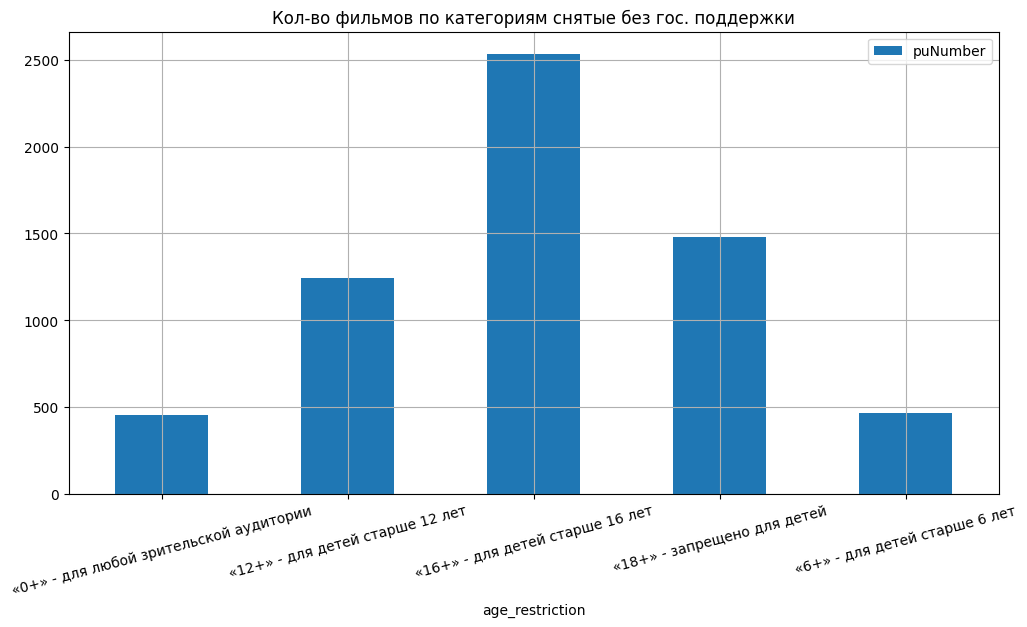

In [89]:
#визуализация на столбчатом графике
gos_pivot_age.plot( y = 'puNumber', figsize = (12,6), grid = True,
                   title = 'Кол-во фильмов по категориям снятые с гос. поддержкой', kind = 'bar')
plt.xticks(rotation=15)

not_gos_pivot_age.plot(y = 'puNumber', figsize = (12,6), grid = True,
                   title = 'Кол-во фильмов по категориям снятые без гос. поддержки', kind = 'bar')
plt.xticks(rotation=15)

plt.show()

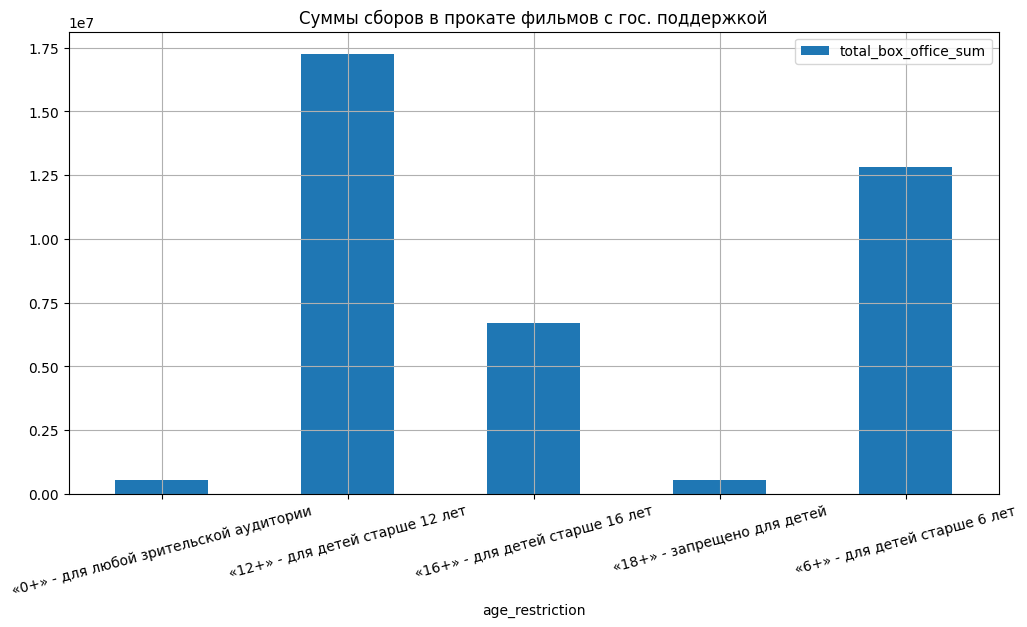

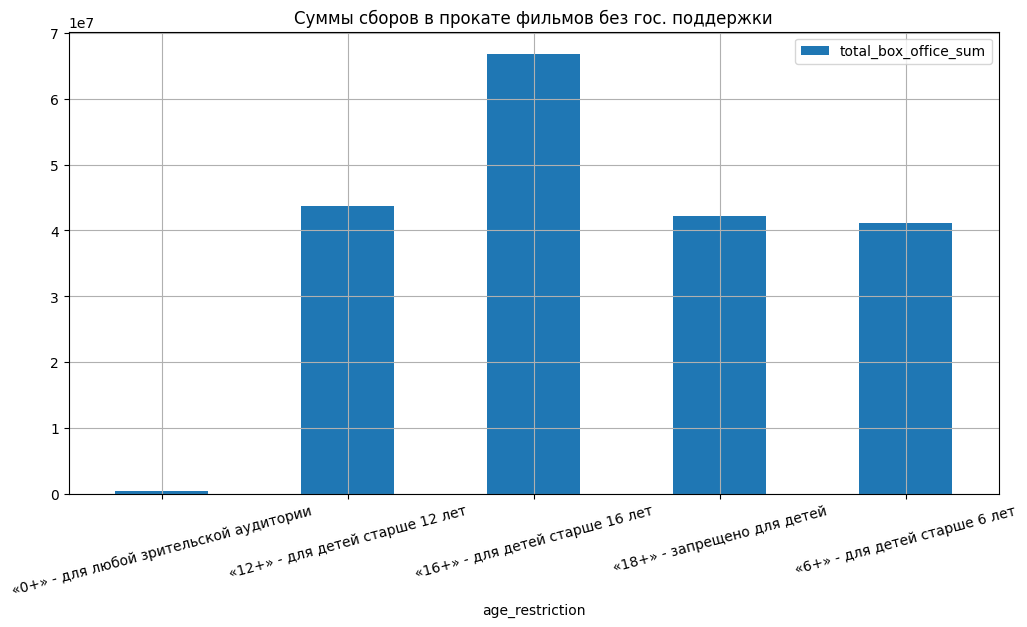

In [90]:
#визуализация на столбчатом графике
gos_pivot_age.plot( y = 'total_box_office_sum', figsize = (12,6), grid = True,
                   title = 'Cуммы сборов в прокате фильмов с гос. поддержкой', kind = 'bar')
plt.xticks(rotation=15)

not_gos_pivot_age.plot(y = 'total_box_office_sum', figsize = (12,6), grid = True,
                   title = 'Cуммы сборов в прокате фильмов без гос. поддержки', kind = 'bar')
plt.xticks(rotation=15)

plt.show()

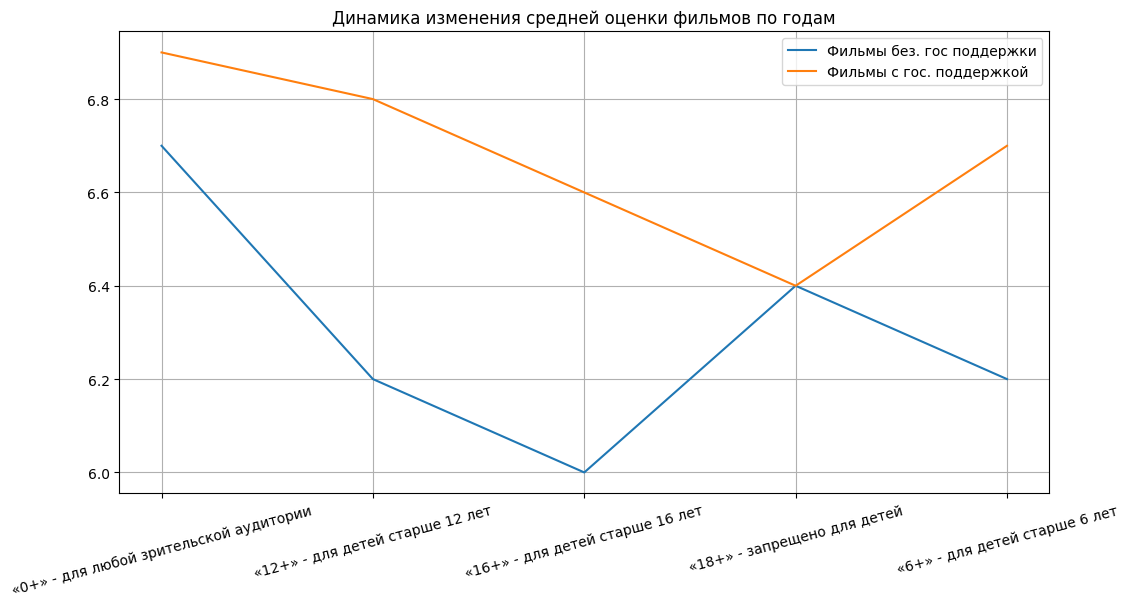

In [91]:
plt.figure(figsize=(12,6))

plt.plot(gos_pivot_age['median_rating'])
plt.plot(not_gos_pivot_age['median_rating'])
plt.grid(True)
plt.xticks(rotation=15)

plt.legend(['Фильмы без. гос поддержки', 'Фильмы с гос. поддержкой'])
plt.title('Динамика изменения средней оценки фильмов по годам')
plt.show()

**Вывод:** Самая распрастраненная категория фильмов с гос. финансированием это 16+ и 12+. Для фильмов без поддержки это 16+ и 18+. Больше всего средств приносит фильмы с категорией 12+ и 6+, а также 16+ (для фильмов с гос. поддержкой и без неё соответственно). Самый низкие рейтинги у фильмов с гос. фин. это 18+. Для фильмов без поддержки это 16+.

<div class="alert alert-success">

**Артём:** 👍 Молодец.

</div> 

In [92]:
#исследование на основе основного жанра фильма

# для измерения кол-ва данных для каждого года 
gos_pivot_genre = gos_finance.pivot_table(index = 'main_genre', 
                                          values = 'puNumber', aggfunc = 'count')
not_gos_pivot_genre = not_gos_finance.pivot_table(index = 'main_genre', 
                                                  values = 'puNumber', aggfunc = 'count')




In [93]:
#суммарная сумма сборов всех фильмов
gos_pivot_genre['total_box_office_sum'] = gos_finance.groupby('main_genre').agg({'box_office': 'sum'})
not_gos_pivot_genre['total_box_office_sum'] = not_gos_finance.groupby('main_genre').agg({'box_office': 'sum'})




In [94]:
#среднйи рейтинг фильмов
gos_pivot_genre['median_rating'] = gos_finance.groupby('main_genre').agg({'ratings': 'median'})
not_gos_pivot_genre['median_rating'] = not_gos_finance.groupby('main_genre').agg({'ratings': 'median'})



In [95]:
# добавим информацию об изменениях бюджетов фильмов в общей сумме
gos_pivot_genre['budget_dinamica'] = gos_finance.groupby('main_genre').agg({'budget': 'sum'})

In [96]:
# топ 5 самых распространенных жанров
gos_pivot_genre = gos_pivot_genre.sort_values(by = 'puNumber', ascending = False)[:5] 
not_gos_pivot_genre = not_gos_pivot_genre.sort_values(by = 'puNumber', ascending = False)[:5] 

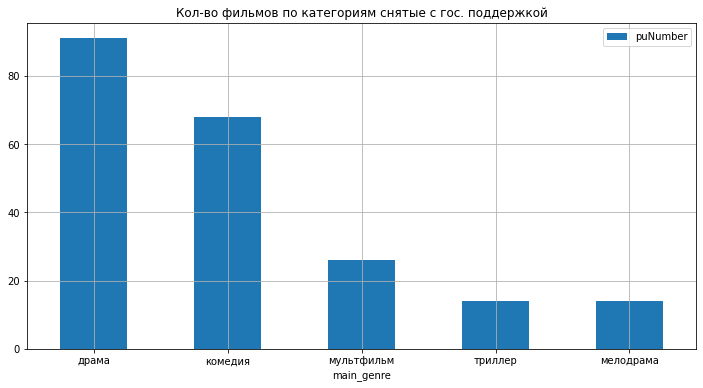

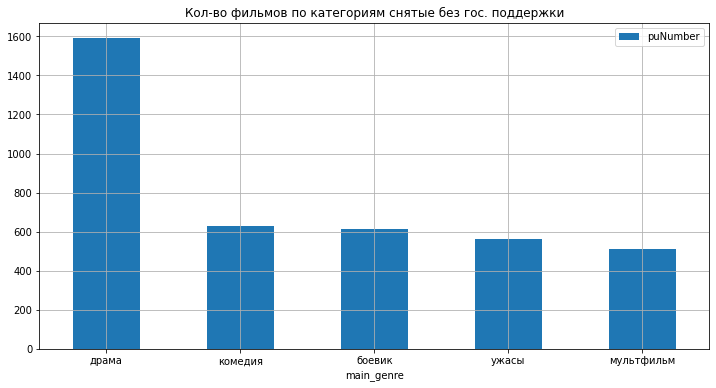

In [87]:
#визуализация на столбчатом графике
gos_pivot_genre.plot( y = 'puNumber', figsize = (12,6), grid = True,
                   title = 'Кол-во фильмов по категориям снятые с гос. поддержкой', 
                     kind = 'bar')
plt.xticks(rotation=0)

not_gos_pivot_genre.plot(y = 'puNumber', figsize = (12,6), grid = True,
                   title = 'Кол-во фильмов по категориям снятые без гос. поддержки', 
                         kind = 'bar')
plt.xticks(rotation=0)

plt.show()

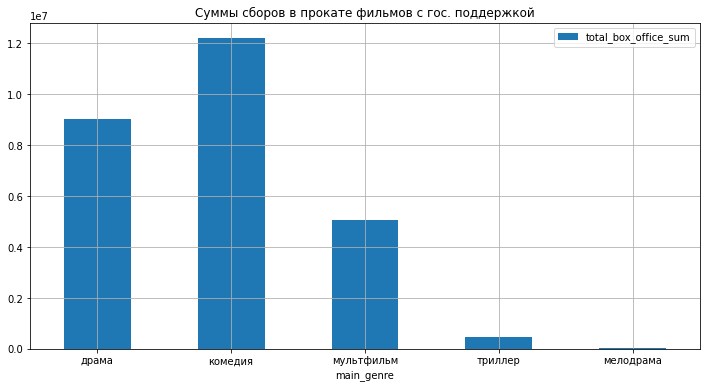

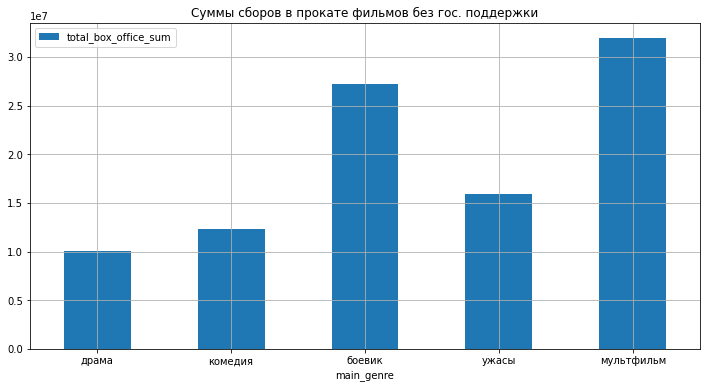

In [88]:
#визуализация на столбчатом графике
gos_pivot_genre.plot( y = 'total_box_office_sum', figsize = (12,6), grid = True,
                   title = 'Cуммы сборов в прокате фильмов с гос. поддержкой', 
                     kind = 'bar')
plt.xticks(rotation=0)

not_gos_pivot_genre.plot(y = 'total_box_office_sum', figsize = (12,6), grid = True,
                   title = 'Cуммы сборов в прокате фильмов без гос. поддержки', 
                    kind = 'bar')
plt.xticks(rotation=0)

plt.show()

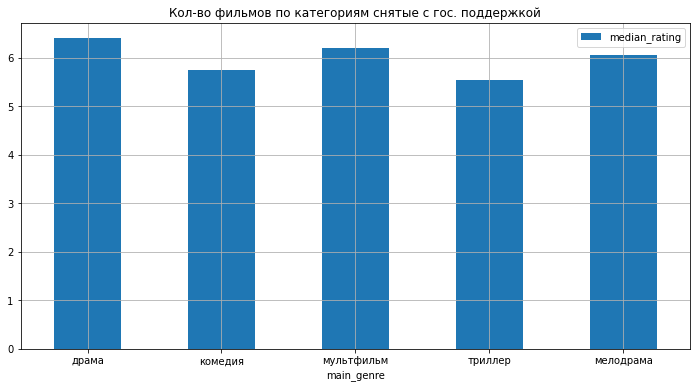

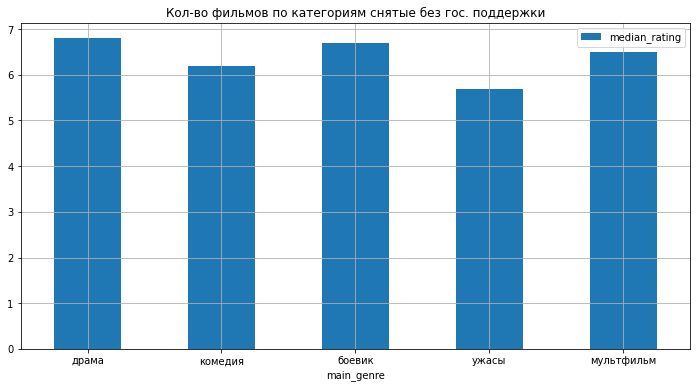

In [89]:
gos_pivot_genre.plot( y = 'median_rating', figsize = (12,6), grid = True,
                   title = 'Кол-во фильмов по категориям снятые с гос. поддержкой', 
                    kind = 'bar')
plt.xticks(rotation=0)

not_gos_pivot_genre.plot(y = 'median_rating', figsize = (12,6), grid = True,
                   title = 'Кол-во фильмов по категориям снятые без гос. поддержки',
                    kind = 'bar')
plt.xticks(rotation=0)

plt.show()

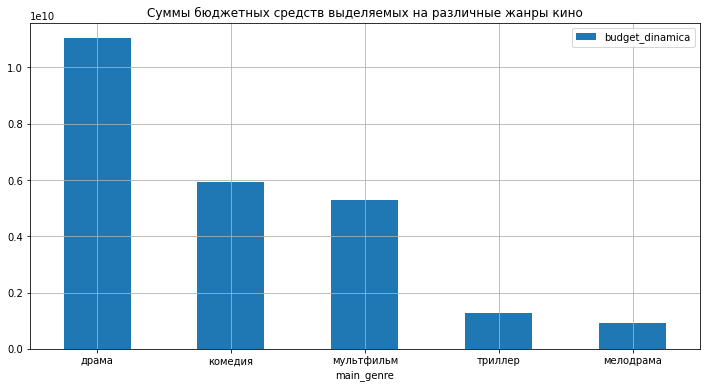

In [90]:
#визуализация на столбчатом графике
gos_pivot_genre.plot( y = 'budget_dinamica', figsize = (12,6), grid = True,
                   title = 'Cуммы бюджетных средств выделяемых на различные жанры кино', 
                    kind = 'bar')
plt.xticks(rotation=0)
plt.show()

**Вывод:** Чаще всего фильмы с гос. поддержкой снимаются в жанре драма или комедия. Без поддержки чаще всего встречаются фильмы с жанром драма. Больше всего средств приносит фильмы с жанром комедия, и мультфильм (для фильмов с гос. поддержкой и без неё соответственно).

In [91]:
gos_finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 1207 to 6478
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   index                  298 non-null    int64              
 1   title                  298 non-null    object             
 2   puNumber               298 non-null    float64            
 3   show_start_date        298 non-null    datetime64[ns, UTC]
 4   type                   298 non-null    object             
 5   film_studio            298 non-null    object             
 6   production_country     298 non-null    object             
 7   director               298 non-null    object             
 8   producer               296 non-null    object             
 9   age_restriction        298 non-null    object             
 10  refundable_support     298 non-null    float64            
 11  nonrefundable_support  298 non-null    float64        

### Шаг 5. Общий вывод

<div style="border:solid steelgreen 4px; padding: 20px; border-radius: 15px">
<h1>Итог:</h1>

>В ходе проведения работы были выполнены следующие операции:
>>- Изучена общая информация о представленном датасете
>>- Создан новый объедененный датасет
>>- Выявлены пропуски в данных в датасете
>>- Заполнены все пропущенные значения в датасете
>>- Переведены изменения типов данных значений в датасете
>>- Добавлены новые колонки в датасет для дальнейшего анализа
>>- Исследованы кол-во фильмов выходившие каждый год
>>- Изучиена динамика проката по годам. 
>>- Посчитана средняя и медианная сумму сборов для каждого года.
>>- Изучено влиянеи на сборы фильмов в разных возрастных категориях по годам
>>- Изучена динамика сборов фильмов с гос. поддержкой
>>- Изучено кол-во фильмов с гос. поддержкой для каждого года
>>- Изучены самые популярные жанры фильмов с гос. поддержкой.

 
>Из представленных датасетов для изучения был создан новый датасет. При  первичном просмотре данных в новом датасете были обнаружены значительные пропуски в колонках в виду отсутствия данных для них. 
Пропущенные значения в столбцах film_studio, production_country, director были удалены ввиду их незначительного количества. Были заполнены пропуски в колонке financing_source. В датасете отсутсвуют явные дубликаты, но присутствует большое количество неявных дубликатов в колонках production_country, type, title и т.д. Неявные дубликаты были устранены, а так же скорректированы типы данных во всех колонках с числовыми показателями для удобства просмотра данных.

> Итоговая длинна датасета была сокращена с 7486 после объеденения датасетов до 6475.

> В ходе изучения данных были сделаны следующие выводы: 
>>- Самый популярный год по колличеству выпускаемых фильмов был 2018. В этот год наблюдается двукратный рост показателя относительно предидущих годов.
>>- Максимальная сумма сборов фильмов в прокате наблюдается в 2018 году.
>>- Меньше всего собирают фильмы с категорией 0+, независимо от года. У фильмов с категрией 12+ заметен существенный провал прокатных сборов в 2017 году. Заметный спад наблюдается у категории фильмов 16+. Данные фильмы собирали до 2018 года больше всего средств. Но в 2019 году фильмы с категориями 6+ 12+ и 16+ собрали в прокате практически одинаковые суммы.
>>- Фильмы с гос. поддержкой собирают в разы меньше средств в общем итогое, чем фильмы без неё. Основная причина - большая разница между кол-вом выходимых фильмов без гос. поддержки и с ней.
>>- Средняя оценка фильмов с гос. поддержкой, начиная с 2014 года, ниже, чем у фильмов без неё. 
>>- Сумма сборов фильмов в прокате в 1000 раз меньше чем сумма выделяемых бюджетных средств. Можно сделать вывод, что большенство фильмов не окупают вложенных средств.
>>- Самая распрастраненная категория фильмов с гос. финансированием это 16+ и 12+. Для фильмов без поддержки это 16+ и 18+. Больше всего средств приносят фильмы с категорией 12+ и 6+, а также 16+ (для фильмов с гос. поддержкой и без неё соответственно). Самый низкие рейтинги у фильмов с гос. фин. это 18+. Для фильмов без поддержки это 16+.
>>- Чаще всего фильмы с гос. поддержкой снимаются в жанре драма или комедия. Без поддержки чаще всего встречаются фильмы с жанром драма. Больше всего средств приносит фильмы с жанром комедия, и мультфильм (для фильмов с гос. поддержкой и без неё соответственно).
    
    
>Обобщая ход исследования необходимо отметить, что для изучения каких-либо показателей корреляции между параметрами, указанными в датасете, маловозможно, в виду сильного разброса данных т.к. выборка не сбалансирована. Это объясняется неоднородностью результатов каждого отдельно снятого и вышедшего в прокат фильма. 

>Рекомендации по ведению базы данных:
>>В датасете были выявлено большое количество опечаток. Также наблюдается отсутствие определенного стандарта записи данных (это касается названия фильмов, имен режиссеров, стран, где снимались фильмы, киностудии). Рекомендую проработать и обговорить определенный стандарт записи данных в указаныных колонках для избежания неявных дубликатов.
</div>